# Winner Prediction of IPL matches Using Xgboost
---



# Introduction:

---

### This report aims to predict the winner of cricket matches using the XGBoost machine learning algorithm. The provided dataset comprises match details from Indian Premier League (IPL). The goal is to develop a model with high predictive accuracy and evaluate its performance based on historical data.

---

# Dataset Description and Course:

### The dataset includes comprehensive details about cricket matches, with the following columns:

### id: Unique identifier for each match.
### season: Year of the match.
### city: City where the match was played.
### date: Date of the match.
### match_type: Type of match (e.g., League).
### player_of_match: Player awarded 'Player of the Match'.
### venue: Venue of the match.
### team1: First team.
### team2: Second team.
### toss_winner: Team that won the toss.
### toss_decision: Decision made by toss winner (bat or field).
### winner: Team that won the match.
### result: Match result (runs or wickets).
### result_margin: Margin of the result.
### target_runs: Runs scored by the team batting first.
### target_overs: Overs faced by the team batting first.
### super_over: Indicates if a super over was played (Y/N).
### method: Method of deciding the result if any special conditions applied.
### umpire1: First umpire.
### umpire2: Second umpire.

---

# AIM/Objective:

### The primary objective is to develop and evaluate a predictive model using the XGBoost algorithm to forecast the winner of cricket matches. The model aims to achieve high accuracy by leveraging historical match data to identify patterns and factors influencing match outcomes.

---

# Importing Libraries

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Dataset

In [3]:
# Load your DataFrame
df = pd.read_csv("matches.csv")

# Top players of the IPL till-2023

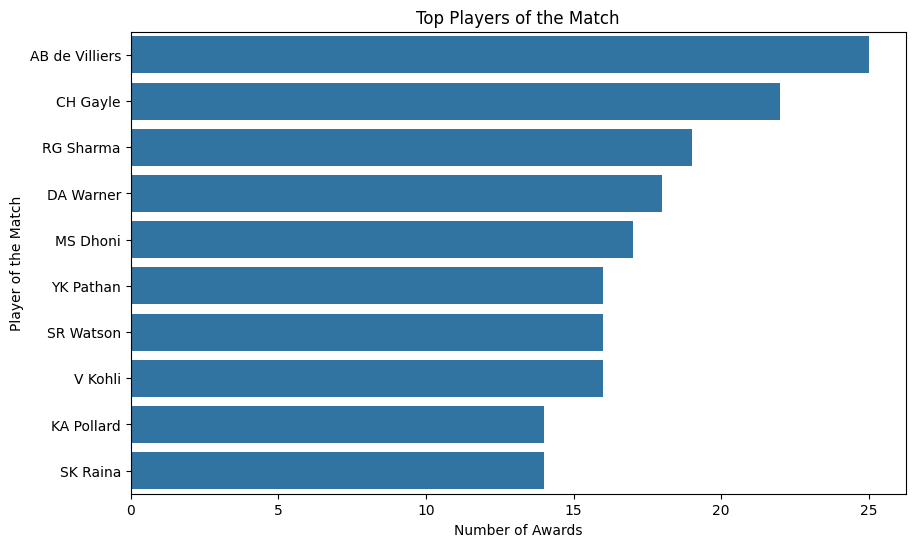

In [18]:
top_players = df['player_of_match'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_players, y=top_players.index)
plt.title('Top Players of the Match')
plt.xlabel('Number of Awards')
plt.ylabel('Player of the Match')
plt.show()


# Distribution of match results

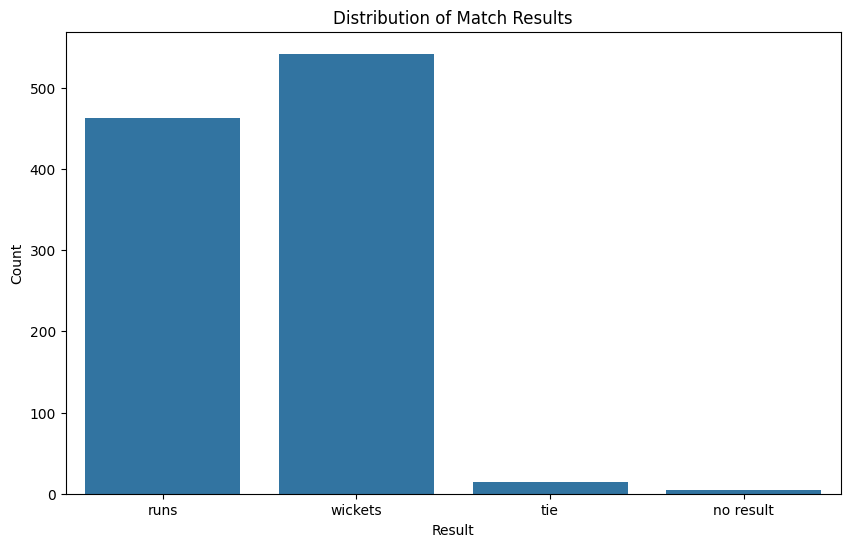

In [17]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='result')
plt.title('Distribution of Match Results')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

# Impact of toss decision on match outcome

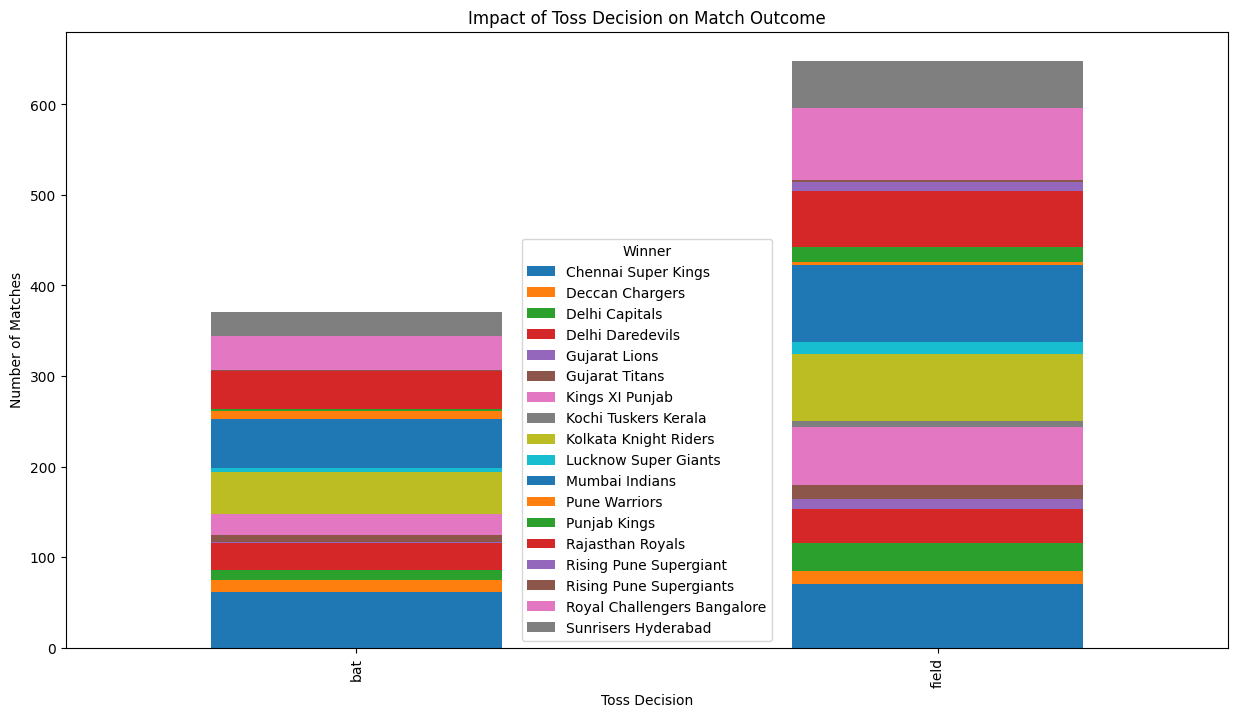

In [21]:

toss_decision_outcome = df.groupby(['toss_decision', 'winner']).size().unstack().fillna(0)
toss_decision_outcome.plot(kind='bar', stacked=True, figsize=(15,8))
plt.title('Impact of Toss Decision on Match Outcome')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')
plt.legend(title='Winner')
plt.show()

# Conversion Of datatypes

In [4]:
# Convert columns to numeric datatype
numeric_columns = ['id', 'season', 'result_margin', 'target_runs', 'target_overs']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1024 non-null   int64  
 1   season           846 non-null    float64
 2   city             973 non-null    object 
 3   date             1024 non-null   object 
 4   match_type       1024 non-null   object 
 5   player_of_match  1019 non-null   object 
 6   venue            1024 non-null   object 
 7   team1            1024 non-null   object 
 8   team2            1024 non-null   object 
 9   toss_winner      1024 non-null   object 
 10  toss_decision    1024 non-null   object 
 11  winner           1019 non-null   object 
 12  result           1024 non-null   object 
 13  result_margin    1005 non-null   float64
 14  target_runs      1021 non-null   float64
 15  target_overs     1021 non-null   float64
 16  super_over       1024 non-null   object 
 17  method        

In [5]:
# Define categorical column names
categorical_columns = ['city', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 
                       'toss_winner', 'toss_decision', 'result', 'super_over', 
                       'method', 'umpire1', 'umpire2']

# Select categorical columns
df_categorical = df[categorical_columns]

# Select numeric columns
df_numeric = df[numeric_columns]

df_numeric.isna().sum()

id                 0
season           178
result_margin     19
target_runs        3
target_overs       3
dtype: int64

# One hot encoding for categorical columns

In [6]:
# One-hot encode categorical columns
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_categorical)

# Combine encoded categorical columns with numeric columns
X = pd.concat([df_numeric, pd.DataFrame(encoded_categorical.toarray())], axis=1)


# Label Encoding for the target variable

In [7]:
# Label encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['winner'])

print(y)

[ 8  0  3 ... 10  5  0]


# Splitting the dataset into training and testing sets

In [8]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XgBoost Model 

In [9]:
# XGBoost model
model = xgb.XGBClassifier(
    learning_rate=0.199,
    n_estimators=180,
    max_depth =8
)

In [10]:
# Fit the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Model Evaluation

## Training Dataset

In [11]:
# Evaluate the model accuracy

y_predictions = model.predict(X_train)
acc_score = accuracy_score(y_train,y_predictions)
print("Accuracy Score :",acc_score*100)

Accuracy Score : 100.0


## Testing Dataset

In [12]:
# Evaluate the model accuracy
acc_score = accuracy_score(y_test,predictions)
print("Accuracy Score :",acc_score*100)

Accuracy Score : 79.02439024390245


# Interpretation: 

### Improved the accuracy by 73.6% to 79.02%.
### The XGBoost model demonstrated a strong predictive capability with an accuracy of 79.02% on the testing set, indicating effective identification of patterns in the match data. By fine-tuning hyperparameters such as learning rate, number of estimators, and maximum depth, the model's performance improved significantly.


# Conclusion:

### The XGBoost model successfully predicts the winner of cricket matches with an accuracy of 79.02%. This demonstrates the model's capability to analyze historical match data and identify patterns that determine match outcomes

---